In [ ]:
#let's train a MLP regression model using this data "dm_office_sales.csv"
#for that we will first separate out X ie features from label ie y
#then we will Train/Test split the data
#we don't need to normalize continuous valued output column/target label
#as that's what we want to predict in the real-world, hence don't change its value
#then we will fit a normalization model on feature vectors only of Train data ir X_Train by calling fit()
#as we do not want to assume any information from the Test dataset otherwise it will result in data leakage
#we do not want any information leaking from the Test dataset or pre-conceived distribution of Test set, 
# so we use fit() method of StandardScaler for X_Train only
# Then it basically learns mean and standard deviation of Train dataset, to scale X_train values feature wise mean centered 
#use this Normalizer object on feature vectors only of Test data ie X_Test by calling transform() 
#as we want to handle pre-processing of X_Train/X_Test using handled similar methods
#our objective is to predict sales using 5 input features where first 2 features are categorical, and next 3 features are numeric
#also each numeric feature is measuring things under different units

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score,make_scorer
from sklearn.neural_network import MLPRegressor

In [2]:
df=pd.read_csv("dm_office_sales.csv")

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
df.shape

(1000, 6)

In [5]:
X=df.iloc[:,:-1] #.values
y=df.iloc[:,-1] #.values #turn df to NumPy array

In [ ]:
#help(train_test_split)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#if we want to compare multiple ml models, they must have same train/test split, 
#i.e. same Train data and Test data
# random state ="same number" ensures it.
#if you want to run multiple experiments
#each with a new Train/Test data
#keep changing the value of random_state option

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder=OneHotEncoder(sparse_output=False,drop='first')
#drop=first to avoid dummy variable trap
scaler=StandardScaler()


In [8]:
X_train

,division,level of education,training level,work experience,salary
703,printers,some college,1,3,69827
311,office supplies,associate's degree,0,7,96135
722,printers,some college,1,5,85711
629,printers,associate's degree,1,4,73192
0,printers,some college,2,6,91684
...,...,...,...,...,...
106,printers,associate's degree,1,7,96834
270,printers,high school,1,2,58603
860,computer hardware,high school,3,4,95202
435,peripherals,high school,3,9,105047


In [9]:
#fit OHE categorical columns for X_train
encoder.fit(X_train[['division','level of education']])

OneHotEncoder(drop='first', sparse_output=False)

In [10]:
#Scale numeric values column wise for X_train
scaler.fit(X_train[['training level','work experience','salary']])

StandardScaler()

In [11]:
#once you fit OHE encoder and scaler on X_train, use it to get transformed X_train vectors
encoded_data_ohe=encoder.transform(X_train[['division','level of education']])

In [12]:
encoded_data_ohe.shape

(670, 8)

In [13]:
X_train_numeric_scaled=scaler.transform(X_train[['training level','work experience','salary']])

In [14]:
X_train_numeric_scaled.shape

(670, 3)

In [15]:
#to concatenate column-wise 2 numpy arrays
X_train_transf=np.hstack((encoded_data_ohe,X_train_numeric_scaled))

In [16]:
X_train_transf.shape


(670, 11)

In [17]:
# Now repeat same steps for X_Test, doing it separately for 
# it saves data leakage and pre-assumes nothing about Test data 
#for deployment you will get Test data separately
encoded_data_ohe_test=encoder.transform(X_test[['division','level of education']])
X_test_numeric_scaled=scaler.transform(X_test[['training level','work experience','salary']])
X_test_transf=np.hstack((encoded_data_ohe_test,X_test_numeric_scaled))


In [18]:
X_test_transf.shape

(330, 11)

In [19]:
from sklearn.neural_network import MLPRegressor

In [20]:
#model=MLPRegressor(hidden_layer_sizes=(5,10),activation="relu",solver='adam',learning_rate='adaptive',max_iter=1500,verbose=True)
model = MLPRegressor(hidden_layer_sizes=(10, ), activation='relu', solver='lbfgs', alpha=0.01, max_iter=2500, random_state=42)

In [22]:
# Define scoring metrics, by default CV tries to maximize scoring options
#but when you want it to minimize it
#you need to set flag greater_is_better as False
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

In [23]:
#perform 10 fold cross validatio to learn best model
from sklearn.model_selection import cross_validate

scores=cross_validate(model,X_train_transf,y_train,scoring=scoring,cv=10,return_estimator=True,return_train_score=True)

In [24]:
scores

{'fit_time': array([0.23079276, 0.09694862, 0.1659832 , 0.18542743, 0.31541562,
        0.23184347, 0.20200562, 0.20725822, 0.24376464, 0.21478701]),
 'score_time': array([0.00090599, 0.00100279, 0.00100017, 0.0010035 , 0.00125527,
        0.00150585, 0.00101757, 0.00101972, 0.00101805, 0.00100255]),
 'estimator': [MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
               random_state=42, solver='lbfgs'),
  MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
               random_state=42, solver='lbfgs'),
  MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
               random_state=42, solver='lbfgs'),
  MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
               random_state=42, solver='lbfgs'),
  MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
               random_state=42, solver='lbfgs'),
  MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
               random_state=42, 

In [25]:
scores_df=pd.DataFrame(scores)

In [26]:
scores_df

,fit_time,score_time,estimator,test_MAE,train_MAE,test_MSE,train_MSE
0,0.230793,0.000906,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-19577.654361,-18284.434745,-6.075667e+08,-5.761464e+08
1,0.096949,0.001003,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-21354.778270,-19147.228064,-7.649207e+08,-6.082987e+08
2,0.165983,0.001000,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-20903.401952,-18915.702623,-7.547987e+08,-5.804443e+08
3,0.185427,0.001004,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-20415.408458,-18219.503509,-7.049529e+08,-5.686253e+08
4,0.315416,0.001255,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-24169.384479,-18277.532492,-1.015624e+09,-5.644614e+08
5,0.231843,0.001506,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-19206.938004,-19410.250857,-6.069508e+08,-6.251903e+08
6,0.202006,0.001018,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-23169.705324,-18212.844925,-8.487323e+08,-5.511898e+08
7,0.207258,0.001020,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-22006.503820,-18933.159138,-7.862998e+08,-5.961127e+08
8,0.243765,0.001018,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-18575.064694,-19151.630417,-5.469321e+08,-6.035014e+08
9,0.214787,0.001003,"MLPRegressor(alpha=0.01, hidden_layer_sizes=(1...",-24626.415233,-18432.291831,-9.723254e+08,-5.651171e+08


In [27]:
scores_df['test_MSE'].max()

-546932115.0769081

In [28]:
scores_df['test_MAE'].max()

-18575.064694018118

In [29]:
best_model_idx = scores_df['test_MSE'].idxmax()  

In [30]:
best_model_idx

8

In [31]:
# now use this best model out of 10 fold cross validation to do prediction on Test data
best_model=scores_df.iloc[8,2] #estimator column has index 2 in scores_df

In [32]:
y_pred=best_model.predict(X_test_transf)

In [33]:
y_pred.shape

(330,)

In [34]:
y_pred

array([460759.47204789, 379837.20234264, 176607.52421053, 392066.42591132,
       324554.89380903, 451093.79186664, 337668.29555649, 406891.70589296,
       279749.35652684, 174933.42513062, 345305.04014662, 402644.66746408,
       475819.64188514, 303899.63579397, 278259.52552786, 443473.75374866,
       344777.41240946, 359285.81357757, 552952.56853269, 177282.83227048,
       516200.47546685, 558705.79359497, 539677.17878455, 397050.0710172 ,
       250606.05952039, 225353.52139761, 410532.5186061 , 277729.89280213,
       225029.38357653, 390355.25083436, 246496.28121742, 291847.38706765,
       287204.16762142, 225485.28804938, 386303.9364116 , 257675.35245992,
       256466.28374191, 353571.21516875, 435105.9071333 , 361760.92595037,
       224356.25493657, 306935.69226644, 480519.03962084, 357967.49286459,
       393268.93730738, 263115.70729654, 398759.96566449, 220906.02624391,
       164478.9664752 , 245115.44028368, 459174.12753478, 554688.30738766,
       324818.69909508, 3

In [35]:
y_test

521    450963
737    383881
740    257699
660    420563
411    332728
        ...  
506    199582
342    266012
485    232183
711    433108
133    358205
Name: sales, Length: 330, dtype: int64

In [36]:
y_test.shape

(330,)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

In [38]:
mean_absolute_error(y_test,y_pred)

19780.41194858047

In [39]:
mean_squared_error(y_test,y_pred)

611171798.92306

In [40]:
root_mean_squared_error(y_test,y_pred)

24721.88906461357

Each blue dot represents an (actual, predicted) pair.
Red dashed line represents the perfect fit (ideal case where y_pred = y_actual).
R² Score (R-squared) indicates how well the model explains variance:
R² = 1 → Perfect fit.
R² > 0.9 → Very good model.
R² ≈ 0.5 → Moderate fit.
R² < 0.2 → Poor fit.

In [41]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: 0.949


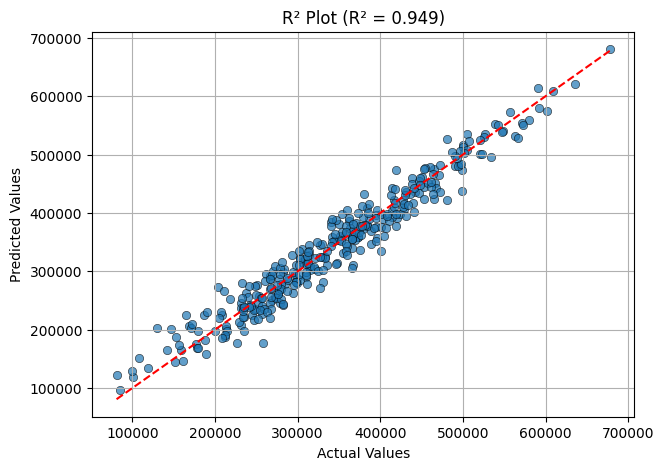

In [ ]:
#plotting R-square plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor='k')  # Scatter plot of actual vs predicted
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')  # Ideal 1:1 line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"R² Plot (R² = {r2:.3f})")
plt.grid(True)
plt.show()

In [43]:
best_model.get_params

<bound method BaseEstimator.get_params of MLPRegressor(alpha=0.01, hidden_layer_sizes=(10,), max_iter=2500,
             random_state=42, solver='lbfgs')>

In [44]:
best_model.hidden_layer_sizes

(10,)

In [45]:
best_model.n_iter_

889

In [46]:
best_model.n_outputs_

1

In [47]:
best_model.n_features_in_

11

In [99]:
from joblib import dump,load

In [100]:
#saving the model for future use
dump(best_model,'model_lr_final.joblib')

['model_lr_final.joblib']

In [101]:
#loading it some other day for a new set of test data for deployment purposes
loaded_model_lr=load('model_lr_final.joblib')

In [102]:
#checking if loaded model has same set of learned parameters e,g regression coefficients in this case 
loaded_model_lr.n_features_in_

11

In [44]:
# To save the trained models use pickle
import pickle

for i, estimator in enumerate(scores_df['estimator']):
    with open(f"model_fold_{i+1}.pkl", "wb") as f:
        pickle.dump(estimator, f)

In [45]:
# To load the trained models use pickle
with open("model_fold_1.pkl", "rb") as f:
    model = pickle.load(f)
    
# Predict using the loaded model
y_pred = model.predict(X_test_transf)

In [46]:
y_pred

array([460387.87996495, 379826.77830008, 168424.44913273, 392405.32657024,
       322213.24125098, 446581.95677458, 334467.34595758, 410916.33912425,
       288758.72476033, 177321.65120081, 348407.52371612, 400134.89655435,
       473623.97217122, 304507.62827181, 280541.42421944, 442009.95224941,
       341392.84692433, 356435.98012033, 561001.40498191, 205237.49023518,
       516584.8919233 , 580745.35533602, 536632.89122119, 394597.39393144,
       254655.87457295, 226510.85938618, 409705.89793789, 278423.96522861,
       223797.0788861 , 387494.43582346, 262722.18731129, 289825.103749  ,
       283325.86023028, 236782.33818986, 384105.56566068, 252651.10210858,
       271559.6332825 , 352332.36577409, 434116.38909368, 362214.3701188 ,
       230569.23735425, 308495.75975838, 476646.20665219, 364132.14063947,
       389778.04212148, 263457.18932427, 401839.00887965, 234747.79445613,
       204320.33528993, 243363.74430944, 453905.83707768, 593015.24521069,
       320971.55410763, 3